In [1]:
!pip install scikit-learn-extra

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import pickle

In [3]:
# Surpress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [5]:
# Retrieve dataset and read first 5 rows
macroNutrient_ffill = pd.read_csv(r"../Dataset/Dataset_for_EDA/macroNutrient_ffill.csv", encoding= 'unicode_escape')
macroNutrient_ffill

No.                                        Description       Category  \
0     15155                          ABALONE,MIXED SPECIES,RAW        ABALONE   
1     15156                           ABALONE,MXD SP,CKD,FRIED        ABALONE   
2      9427                                        ABIYUCH,RAW        ABIYUCH   
3      9002                                  ACEROLA JUICE,RAW  ACEROLA JUICE   
4      9001                   ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA   
...     ...                                                ...            ...   
8785   1119        YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ         YOGURT   
8786   1220  YOGURT,VANILLA,LOFAT,11 GRAMS PROT PER 8 OZ,FO...         YOGURT   
8787   1295                             YOGURT,VANILLA,NON-FAT         YOGURT   
8788  16004                 YOKAN,PREP FROM ADZUKI BNS & SUGAR          YOKAN   
8789   3217                                           ZWIEBACK       ZWIEBACK   

      Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0               105             6.01       17.10            0.76   
1               189            11.05       19.63            6.78   
2                69            17.60        1.50            0.10   
3                23             4.80        0.40            0.30   
4                32             7.69        0.40            0.30   
...             ...              ...         ...             ...   
8785             85            13.80        4.93            1.25   
8786             85            13.80        4.93            1.25   
8787             78            17.04        2.94            0.00   
8788            260            60.72        3.29            0.12   
8789            426            74.20       10.10            9.70   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                              0.107                           0.104   
1                              2.741                           1.676   
2                              2.741                           1.676   
3                              0.082                           0.090   
4                              0.082                           0.090   
...                              ...                             ...   
8785                           0.343                           0.036   
8786                           0.343                           0.036   
8787                           0.000                           0.000   
8788                           0.011                           0.026   
8789                           4.244                           2.073   

      Saturated Fatty Acids(g)  
0                        0.149  
1                        1.646  
2                        0.014  
3                        0.068  
4                        0.068  
...                        ...  
8785                     0.806  
8786                     0.806  
8787                     0.000  
8788                     0.043  
8789                     2.525  

[8790 rows x 10 columns]

In [6]:
macroNutrient_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No.                             8790 non-null   int64  
 1   Description                     8790 non-null   object 
 2   Category                        8790 non-null   object 
 3   Energy (Kcal)                   8790 non-null   int64  
 4   Carbohydrate(g)                 8790 non-null   float64
 5   Protein(g)                      8790 non-null   float64
 6   Total Lipid(g)                  8790 non-null   float64
 7   Monounsaturated Fatty Acids(g)  8790 non-null   float64
 8   Polyunsaturated Fatty Acids(g)  8790 non-null   float64
 9   Saturated Fatty Acids(g)        8790 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 686.8+ KB


In [7]:
macroNutrient_ffill.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222     226.317634        22.127710    11.342849   
std     9251.413586     169.877539        27.270822    10.530474   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000      91.000000         0.050000     2.380000   
50%    14427.500000     191.000000         9.340000     8.000000   
75%    20142.750000     337.000000        34.910000    19.880000   
max    93600.000000     902.000000       100.000000    88.320000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean        10.553725                        3.938187   
std         15.814842                        6.893998   
min          0.000000                        0.000000   
25%          0.950000                        0.200000   
50%          5.140000                        1.744000   
75%         13.720000                        4.880000   
max        100.000000                       83.689000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         2.270836                  3.533059  
std                          5.346557                  6.543167  
min                          0.000000                  0.000000  
25%                          0.201000                  0.203000  
50%                          0.671000                  1.511500  
75%                          2.050000                  4.256000  
max                         74.623000                 95.600000

In [8]:
macroNutrient_ffill.head()

No.                       Description       Category  Energy (Kcal)  \
0  15155         ABALONE,MIXED SPECIES,RAW        ABALONE            105   
1  15156          ABALONE,MXD SP,CKD,FRIED        ABALONE            189   
2   9427                       ABIYUCH,RAW        ABIYUCH             69   
3   9002                 ACEROLA JUICE,RAW  ACEROLA JUICE             23   
4   9001  ACEROLA,(WEST INDIAN CHERRY),RAW        ACEROLA             32   

   Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0             6.01       17.10            0.76   
1            11.05       19.63            6.78   
2            17.60        1.50            0.10   
3             4.80        0.40            0.30   
4             7.69        0.40            0.30   

   Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.107                           0.104   
1                           2.741                           1.676   
2                           2.741                           1.676   
3                           0.082                           0.090   
4                           0.082                           0.090   

   Saturated Fatty Acids(g)  
0                     0.149  
1                     1.646  
2                     0.014  
3                     0.068  
4                     0.068

In [9]:
float_columns = [x for x in macroNutrient_ffill.columns if x not in ['No.', 'Description', 'Category']]

In [10]:
skew_columns = (macroNutrient_ffill[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
print("{} of the 7 columns are skewed with the vast majority being heavily skewed".format(len(skew_columns)))
skew_columns

7 of the 7 columns are skewed with the vast majority being heavily skewed


Saturated Fatty Acids(g)          6.511957
Polyunsaturated Fatty Acids(g)    6.288229
Monounsaturated Fatty Acids(g)    4.582116
Total Lipid(g)                    3.309724
Protein(g)                        1.166368
Energy (Kcal)                     1.148610
Carbohydrate(g)                   1.127598
dtype: float64

In [11]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    macroNutrient_ffill[col] = np.log1p(macroNutrient_ffill[col])

In [12]:
macroNutrient_ffill[float_columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          4.663439         1.947338    2.895912        0.565314   
1          5.247024         2.489065    3.026746        2.051556   
2          4.248495         2.923162    0.916291        0.095310   
3          3.178054         1.757858    0.336472        0.262364   
4          3.496508         2.162173    0.336472        0.262364   
...             ...              ...         ...             ...   
8785       4.454347         2.694627    1.780024        0.810930   
8786       4.454347         2.694627    1.780024        0.810930   
8787       4.369448         2.892592    1.371181        0.000000   
8788       5.564520         4.122608    1.456287        0.113329   
8789       6.056784         4.320151    2.406945        2.370244   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.101654                        0.098940   
1                           1.319353                        0.984323   
2                           1.319353                        0.984323   
3                           0.078811                        0.086178   
4                           0.078811                        0.086178   
...                              ...                             ...   
8785                        0.294906                        0.035367   
8786                        0.294906                        0.035367   
8787                        0.000000                        0.000000   
8788                        0.010940                        0.025668   
8789                        1.657085                        1.122654   

      Saturated Fatty Acids(g)  
0                     0.138892  
1                     0.973049  
2                     0.013903  
3                     0.065788  
4                     0.065788  
...                        ...  
8785                  0.591114  
8786                  0.591114  
8787                  0.000000  
8788                  0.042101  
8789                  1.259880  

[8790 rows x 7 columns]

In [13]:
macroNutrient_ffill.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       5.065342         2.137177     2.047259   
std     9251.413586       0.997539         1.615109     1.068937   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       4.521789         0.048790     1.217876   
50%    14427.500000       5.257495         2.336020     2.197225   
75%    20142.750000       5.823046         3.581016     3.038792   
max    93600.000000       6.805723         4.615121     4.492225   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         1.770891                        1.096978   
std          1.183944                        0.930516   
min          0.000000                        0.000000   
25%          0.667829                        0.182322   
50%          1.814823                        1.009416   
75%          2.689207                        1.771557   
max          4.615121                        4.438986   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.758119                  1.042038  
std                          0.761411                  0.891404  
min                          0.000000                  0.000000  
25%                          0.183155                  0.184818  
50%                          0.513422                  0.920880  
75%                          1.115142                  1.659370  
max                          4.325760                  4.570579

In [14]:
scaler = MinMaxScaler()
macroNutrient_ffill[float_columns] = scaler.fit_transform(macroNutrient_ffill[float_columns])

macroNutrient_ffill.describe()

No.  Energy (Kcal)  Carbohydrate(g)   Protein(g)  \
count   8790.000000    8790.000000      8790.000000  8790.000000   
mean   15663.495222       0.744277         0.463082     0.455734   
std     9251.413586       0.146574         0.349960     0.237953   
min     1001.000000       0.000000         0.000000     0.000000   
25%     9086.250000       0.664410         0.010572     0.271107   
50%    14427.500000       0.772511         0.506167     0.489117   
75%    20142.750000       0.855610         0.775931     0.676456   
max    93600.000000       1.000000         1.000000     1.000000   

       Total Lipid(g)  Monounsaturated Fatty Acids(g)  \
count     8790.000000                     8790.000000   
mean         0.383715                        0.247124   
std          0.256536                        0.209624   
min          0.000000                        0.000000   
25%          0.144705                        0.041073   
50%          0.393234                        0.227398   
75%          0.582695                        0.399090   
max          1.000000                        1.000000   

       Polyunsaturated Fatty Acids(g)  Saturated Fatty Acids(g)  
count                     8790.000000               8790.000000  
mean                         0.175257                  0.227988  
std                          0.176018                  0.195031  
min                          0.000000                  0.000000  
25%                          0.042340                  0.040437  
50%                          0.118689                  0.201480  
75%                          0.257791                  0.363055  
max                          1.000000                  1.000000

In [15]:
X = macroNutrient_ffill[float_columns]
X

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## Dimensionality Reduction

In [16]:
from clustering_function import dimensionality_reduction,scatter_plot_clustering

In [17]:
# Reduced to 2 dimensions using tsne
X_tsne_reduced, tsne_x_data, tsne_y_data, reduction_method = dimensionality_reduction(X, 't-SNE', n_components=2)

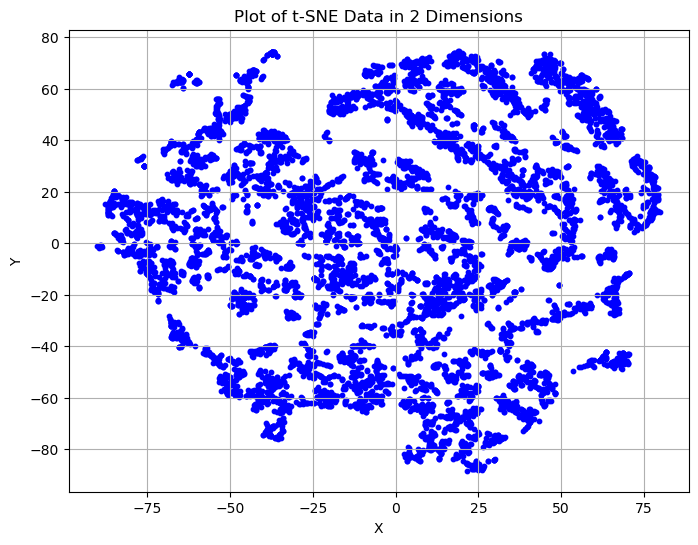

In [18]:
scatter_plot_clustering(tsne_x_data, tsne_y_data, reduction_method)

In [19]:
X_tsne_reduced

array([[ -8.989075 ,  31.090435 ],
       [ 13.958134 ,  -1.3963675],
       [-18.659637 ,   1.305004 ],
       ...,
       [-57.381187 ,  -4.2275133],
       [-53.439835 , -44.303345 ],
       [  9.957876 , -40.068977 ]], dtype=float32)

In [20]:
pd.DataFrame(X_tsne_reduced).to_csv("../Dataset/Dataset_for_reduced_data/ffill_reduced.csv")

In [21]:
# Reduced to 2 dimensions using pca
X_pca_reduced, pca_x_data, pca_y_data, reduction_method = dimensionality_reduction(X, 'PCA', n_components=2)

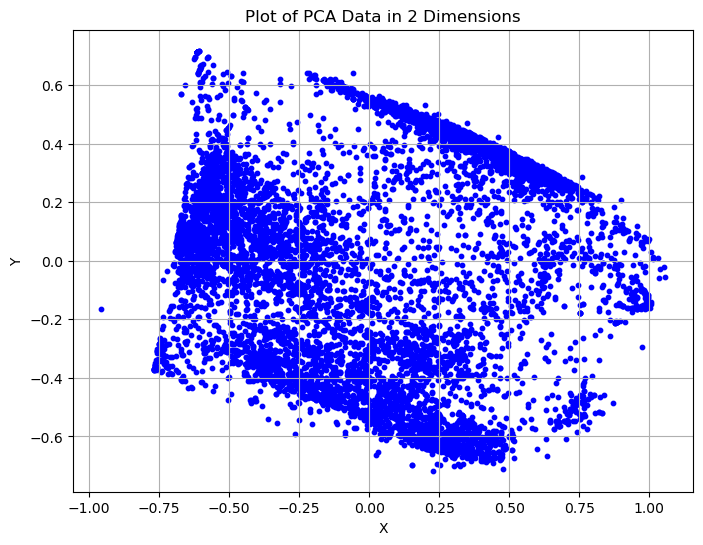

In [22]:
scatter_plot_clustering(pca_x_data, pca_y_data, reduction_method)

In [23]:
X_pca_reduced

array([[-0.29088958,  0.23057369],
       [ 0.11850522, -0.07480744],
       [-0.42526578, -0.06524217],
       ...,
       [-0.58417049,  0.0538185 ],
       [-0.61134978, -0.22821292],
       [ 0.06412414, -0.51357234]])

## K Means: Optimal number of clusters

#### Silhoutte Analysis

In [24]:
from clustering_function import plot_silhouette_analysis

For n_clusters = 2 The average silhouette_score is : 0.36078945
For n_clusters = 3 The average silhouette_score is : 0.42574793
For n_clusters = 4 The average silhouette_score is : 0.38394642
For n_clusters = 5 The average silhouette_score is : 0.37054422
For n_clusters = 6 The average silhouette_score is : 0.4055738
For n_clusters = 7 The average silhouette_score is : 0.4010748


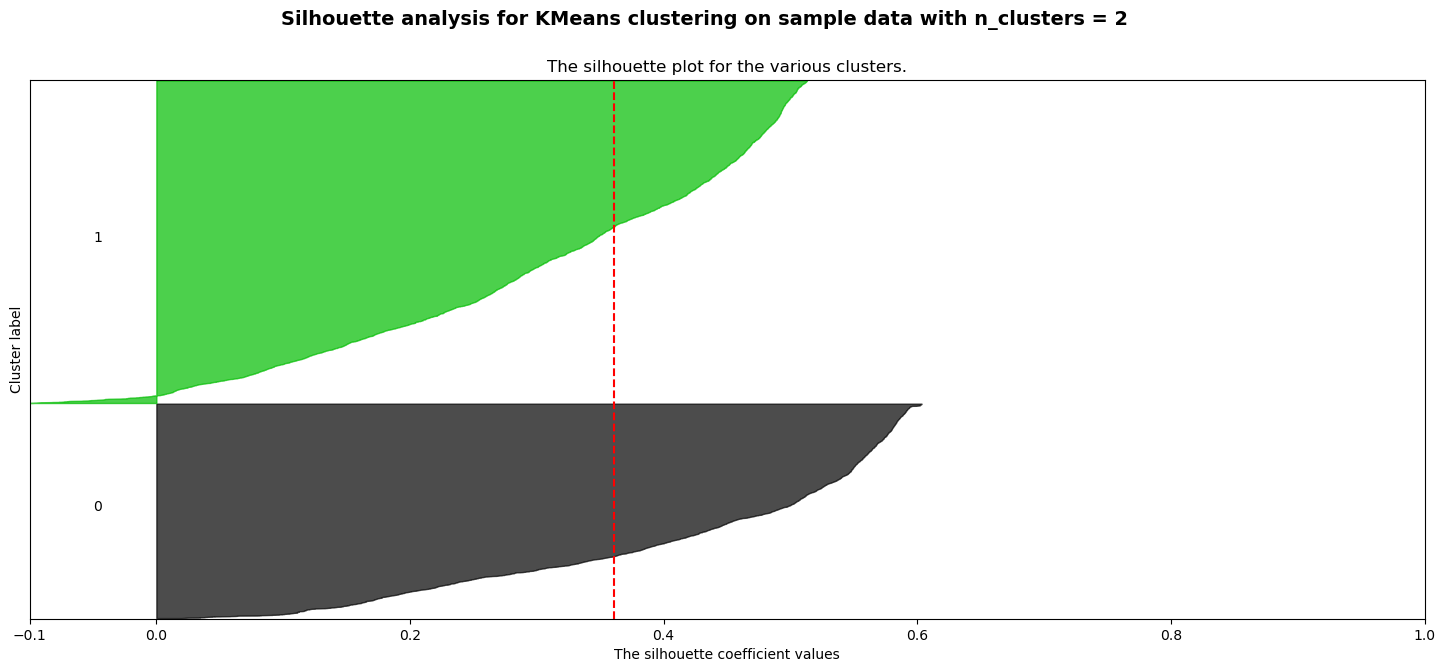

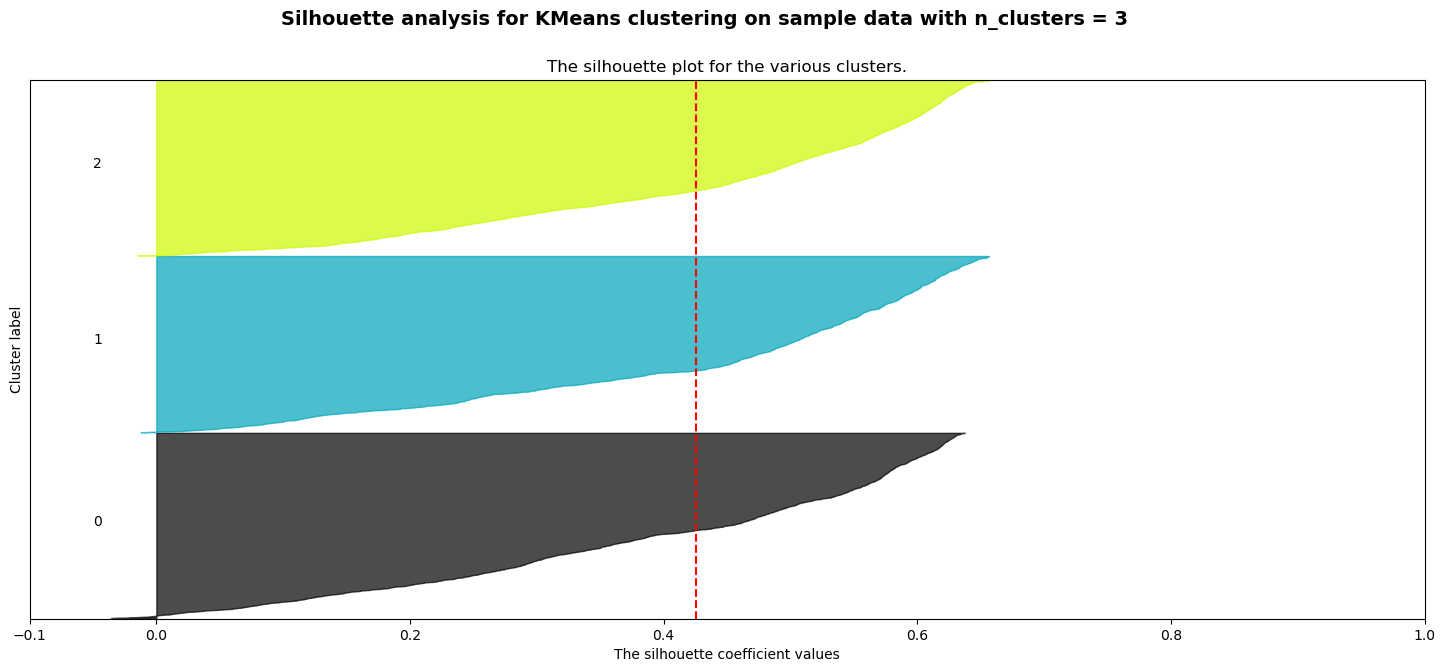

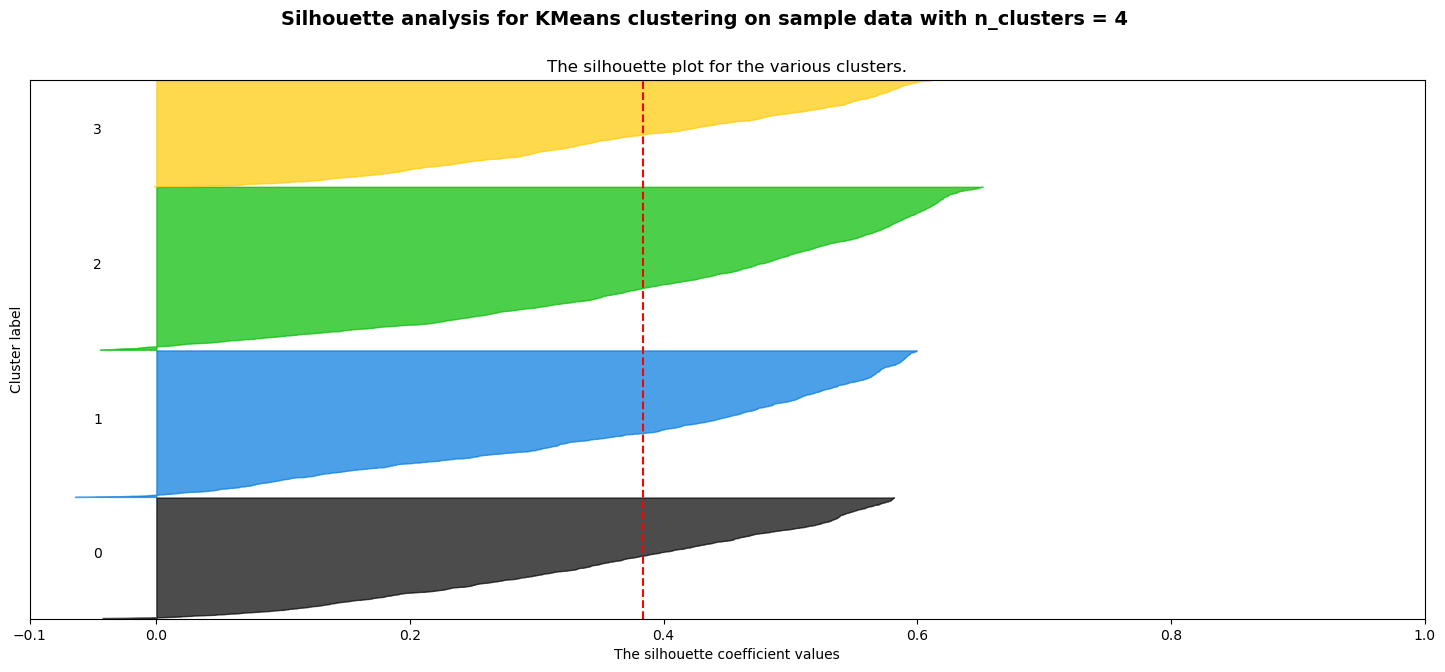

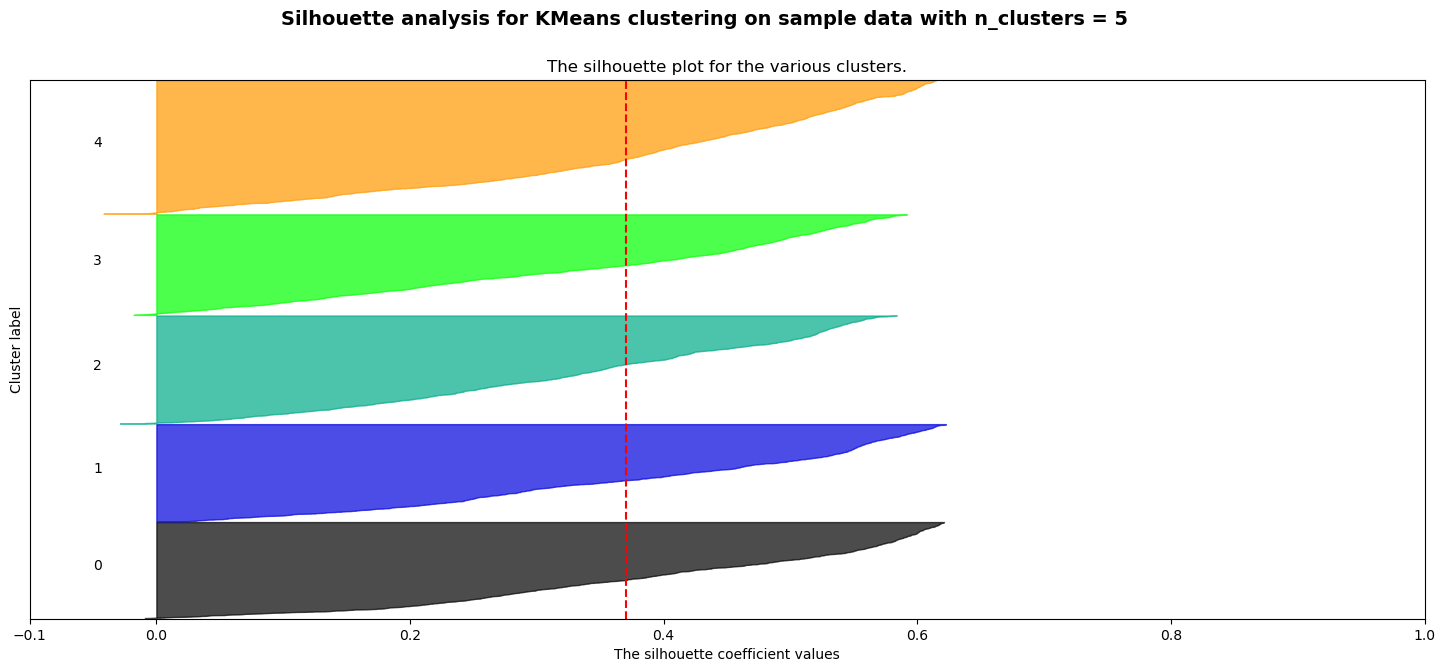

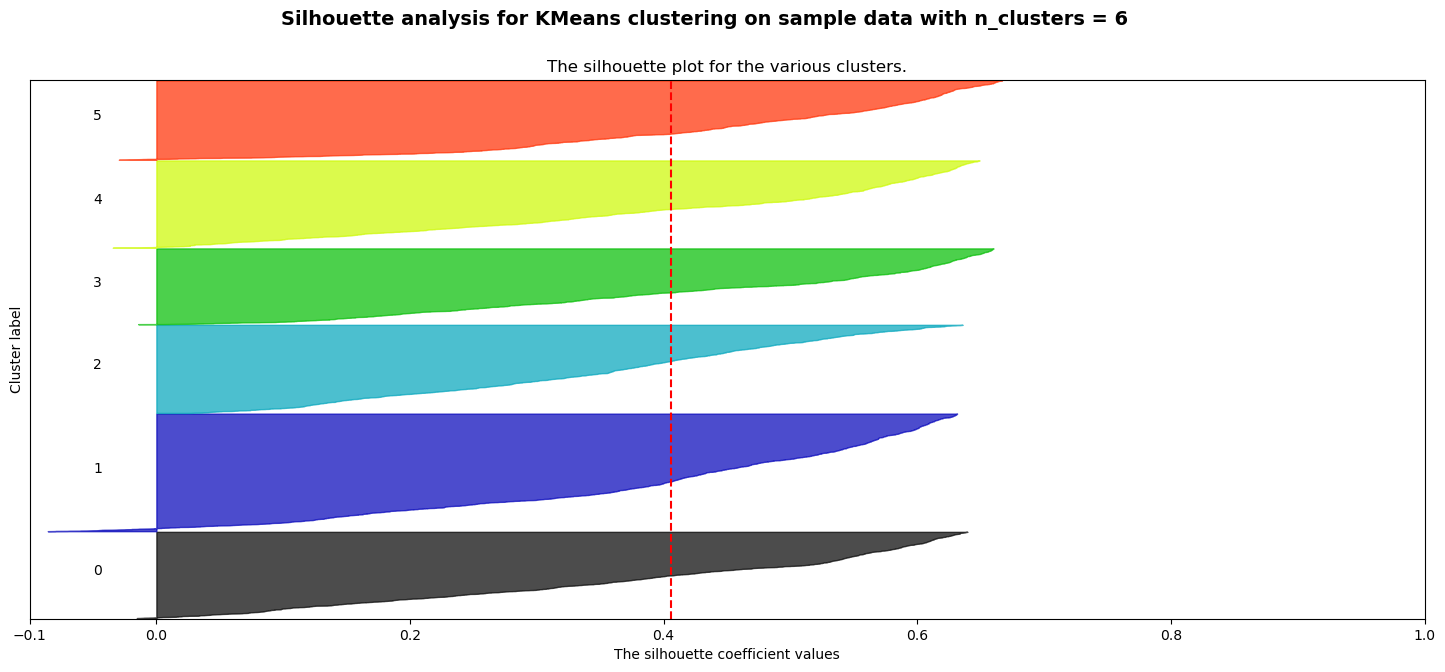

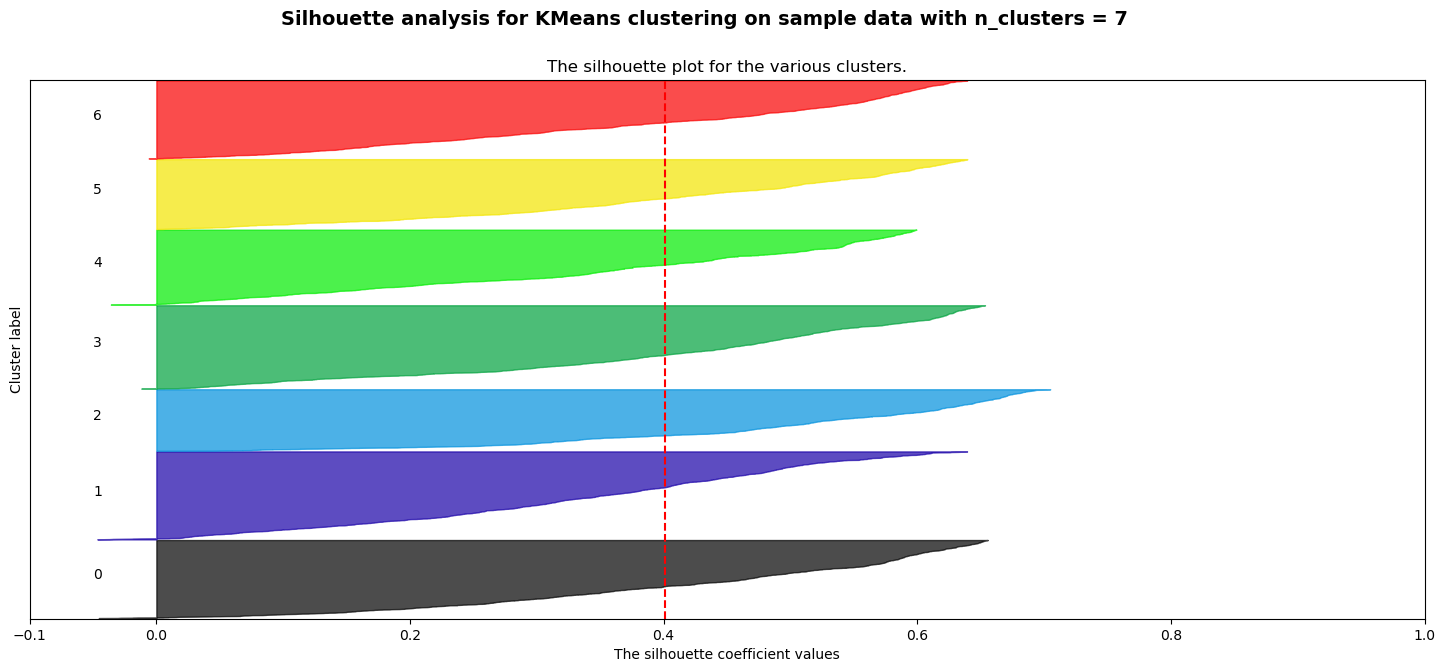

In [25]:
tsne_list_num_clusters = list(range(2,8))
plot_silhouette_analysis(X_tsne_reduced, tsne_list_num_clusters)

#### Elbow Method

In [26]:
from clustering_function import elbow_method_analysis

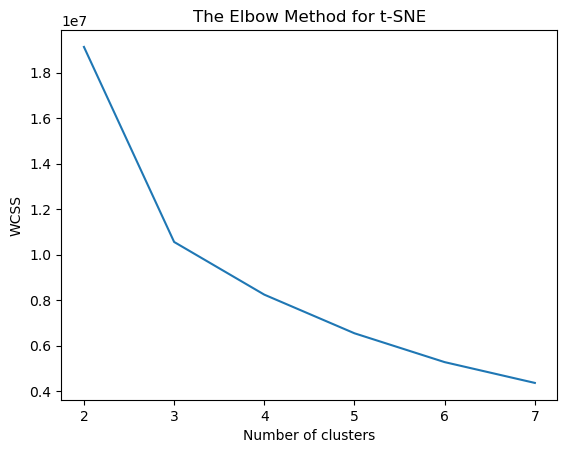

In [27]:
elbow_method_analysis(X_tsne_reduced)

## Clustering

In [28]:
# Trackers throughout each model
scores = {} # to track the silhoutte score of the tuned model
food_groups = {} # to track the counts of each group

In [29]:
X_with_labels = X.copy()
X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  
0                     0.030388  
1                     0.212894  
2                     0.003042  
3                     0.014394  
4                     0.014394  
...                        ...  
8785                  0.129330  
8786                  0.129330  
8787                  0.000000  
8788                  0.009211  
8789                  0.275650  

[8790 rows x 7 columns]

## K Means Clustering

In [30]:
from clustering_function import perform_kmeans_clustering, plot_clusters

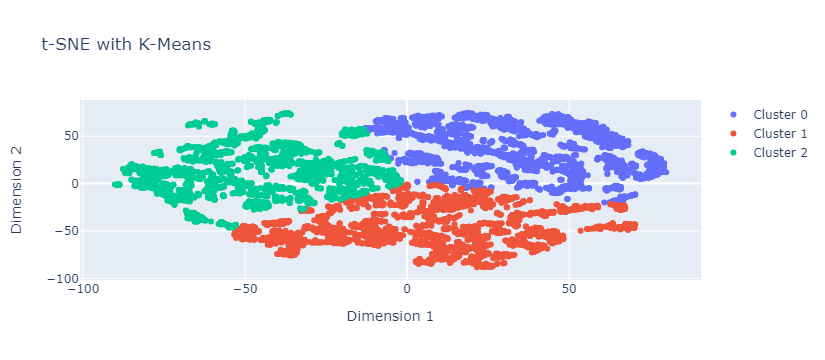

In [31]:
tsne_clust_labels, kmean_model = perform_kmeans_clustering(X_tsne_reduced, 3)
plot_clusters(X_tsne_reduced, tsne_clust_labels, 'K-Means')

In [32]:
# export model
with open('../Model_fitted/Kmeans_model_ffill_pkl', 'wb') as files:
    pickle.dump(kmean_model, files)

In [33]:
X_with_labels['kmeans_tsne'] = tsne_clust_labels
scores['kmeans_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['kmeans_tsne']))

X_with_labels

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
...             ...              ...         ...             ...   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
...                              ...                             ...   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            2  
1                     0.212894            0  
2                     0.003042            2  
3                     0.014394            2  
4                     0.014394            2  
...                        ...          ...  
8785                  0.129330            2  
8786                  0.129330            2  
8787                  0.000000            2  
8788                  0.009211            2  
8789                  0.275650            1  

[8790 rows x 8 columns]

In [34]:
from clustering_function import get_food_groups, plot_cluster_distribution

In [35]:
food_groups, value_counts = get_food_groups(X_with_labels['kmeans_tsne'], 'KMeans_tsne',food_groups)

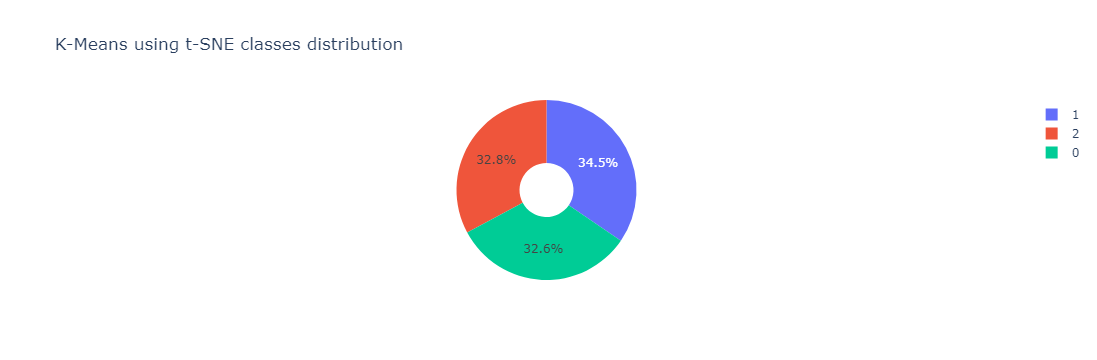

In [36]:
plot_cluster_distribution(value_counts, 'K-Means')

In [37]:
kmeans_tsne = X_with_labels.groupby('kmeans_tsne')

In [38]:
n = kmeans_tsne['kmeans_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(kmeans_tsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
103        0.999184         0.000000    0.000000        0.998925   
...             ...              ...         ...             ...   
8747       0.767846         0.663975    0.715473        0.139076   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
103                         0.861886                        0.577201   
...                              ...                             ...   
8747                        0.000000                        0.000000   
8749                        0.080576                        0.140080   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  
1                     0.212894            0  
14                    0.395637            0  
100                   0.254692            0  
101                   0.180514            0  
103                   0.807114            0  
...                        ...          ...  
8747                  0.000000            0  
8749                  0.000000            0  
8750                  0.180322            0  
8771                  0.175470            0  
8773                  0.267429            0  

[2869 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
10         0.857339         0.957418    0.221928        0.113698   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8710       0.753763         0.650193    0.611561        0.424712   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
10                          0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8710                        0.223756                        0.326182   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  
5                     0.348734            1  
7                     0.355775            1  
8                     0.308817            1  
10                    0.308817            1  
12                    0.494853            1  
...                        ...          ...  
8710                  0.140432            1  
8725                  0.360711            1  
8745                  0.063870            1  
8748                  0.000000            1  
8789                  0.275650            1  

[3034 rows x 8 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  
0                     0.030388            2  
2                     0.003042            2  
3                     0.014394            2  
4                     0.014394            2  
6                     0.180322            2  
...                        ...          ...  
8784                  0.122689            2  
8785                  0.129330            2  
8786                  0.129330            2  
8787                  0.000000            2  
8788                  0.009211            2  

[2887 rows x 8 columns]

### Insights

- Cluster 0 indicates low value in carbohydrates and high value in protein. 
- Cluster 1 shows very high values in energy, with moderate to high values in carbohydrates and total lipids on average. 
- Cluster 2 exhibits moderate values in energy and carbohydrates, slightly low values in protein, and very low values in total lipids.

## Agglomerative Clustering

In [39]:
from clustering_function import tuning_agglomerative, perform_agg_clustering

In [40]:
agg_param_grid = {
      'n_clusters': [2, 3, 4, 5, 6],
      'linkage': ['ward'],
      'affinity' : ['euclidean']
  }

In [41]:
tuning_agglomerative(X_tsne_reduced, agg_param_grid)

Best silhouette score: 0.40226936
Best parameters: {'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 3}


In [42]:
Agg_tsne_clust_labels,agg_model = perform_agg_clustering(X_tsne_reduced, 3)

In [43]:
# export model
with open('../Model_fitted/Agg_model_ffill_pkl', 'wb') as files:
    pickle.dump(agg_model, files)

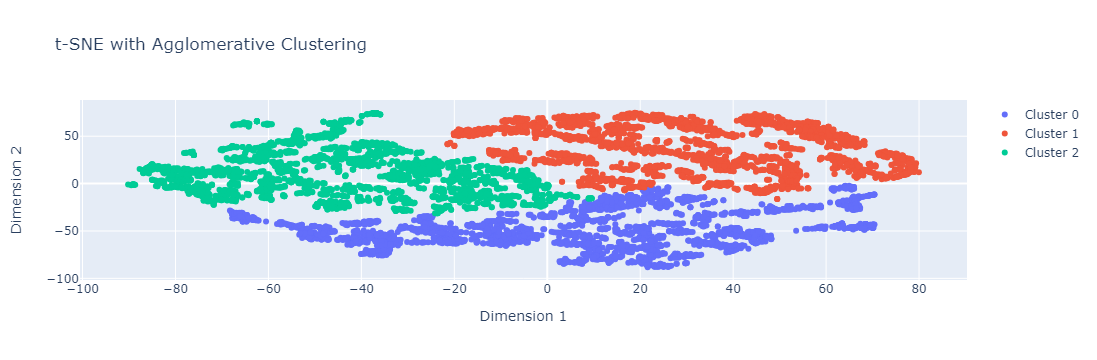

In [44]:
plot_clusters(X_tsne_reduced, Agg_tsne_clust_labels, "Agglomerative Clustering")

In [45]:
X_with_labels['Agg_tsne'] = Agg_tsne_clust_labels
scores['Agg_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Agg_tsne']))

In [46]:
food_groups, value_counts = get_food_groups(X_with_labels['Agg_tsne'], 'Agglomerative_tsne',food_groups)

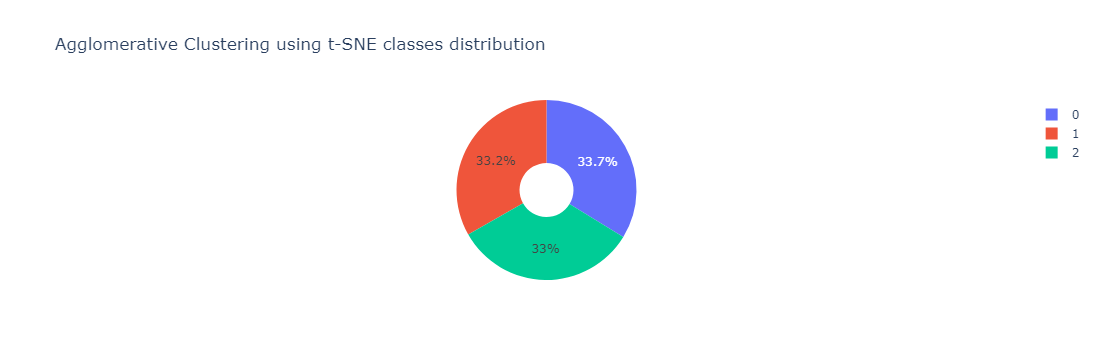

In [47]:
plot_cluster_distribution(value_counts, 'Agglomerative Clustering')

In [48]:
Aggtsne = X_with_labels.groupby('Agg_tsne')

In [49]:
n = Aggtsne['Agg_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Aggtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
10         0.857339         0.957418    0.221928        0.113698   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
10                          0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
5                     0.348734            1         0  
7                     0.355775            1         0  
8                     0.308817            1         0  
10                    0.308817            1         0  
12                    0.494853            1         0  
...                        ...          ...       ...  
8725                  0.360711            1         0  
8745                  0.063870            1         0  
8748                  0.000000            1         0  
8788                  0.009211            2         0  
8789                  0.275650            1         0  

[2965 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8747       0.767846         0.663975    0.715473        0.139076   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
...                              ...                             ...   
8747                        0.000000                        0.000000   
8749                        0.080576                        0.140080   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
0                     0.030388            2         1  
1                     0.212894            0         1  
14                    0.395637            0         1  
100                   0.254692            0         1  
101                   0.180514            0         1  
...                        ...          ...       ...  
8747                  0.000000            0         1  
8749                  0.000000            0         1  
8750                  0.180322            0         1  
8771                  0.175470            0         1  
8773                  0.267429            0         1  

[2920 rows x 9 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.626129                        0.398092   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  
2                     0.003042            2         2  
3                     0.014394            2         2  
4                     0.014394            2         2  
6                     0.180322            2         2  
9                     0.308817            2         2  
...                        ...          ...       ...  
8783                  0.024012            2         2  
8784                  0.122689            2         2  
8785                  0.129330            2         2  
8786                  0.129330            2         2  
8787                  0.000000            2         2  

[2905 rows x 9 columns]

### Insights

- Cluster 0 is characterized by the highest values for carbohydrate and energy among all three clusters. 
- Cluster 1 contains the highest values for protein among all three clusters, indicating foods rich in protein lie in this cluster . 
- Cluster 2 contains moderate values of energy, carbohydrate, and protein, and is quite low in fats, suggesting a healthy food group for this cluster.

## GMM

In [50]:
from clustering_function import gmm_bic_score, perform_gmm_clustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [51]:
gmm_param_grid = {
    "n_components": range(1, 6),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=gmm_param_grid, scoring=gmm_bic_score
)

In [52]:
grid_search.fit(X_tsne_reduced)
Gmm_tsne_results = grid_search.cv_results_

In [53]:
Gmm_tsne_df = pd.DataFrame(Gmm_tsne_results)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
Gmm_tsne_df["mean_test_score"] = -Gmm_tsne_df["mean_test_score"]
Gmm_tsne_df = Gmm_tsne_df.rename(
    columns={
        "param_n_components": "Number of Components",
        "param_covariance_type": "Type of Covariance",
        "mean_test_score": "BIC Score",
    }
)
Gmm_tsne_df.sort_values(by="BIC Score").head()

Number of Components Type of Covariance     BIC Score
12                    3               diag  36324.865394
9                     5               tied  36338.504336
2                     3          spherical  36344.491667
7                     3               tied  36349.203216
17                    3               full  36394.681943

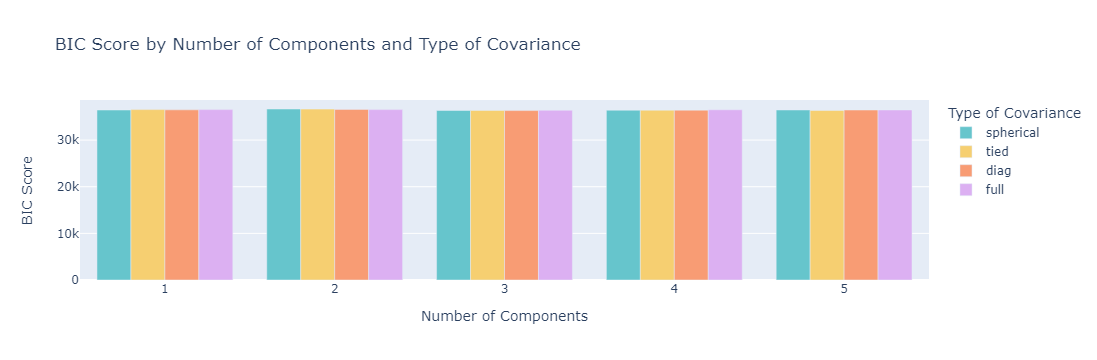

In [54]:
fig = px.bar(Gmm_tsne_df, x="Number of Components", y="BIC Score",
                 color="Type of Covariance", barmode="group",
                 title="BIC Score by Number of Components and Type of Covariance",
                 color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [55]:
Gmm_tsne_labels,gmm_model = perform_gmm_clustering(X_tsne_reduced, 3, 'diag')

In [56]:
# export model
with open('../Model_fitted/Gmm_model_ffill_pkl', 'wb') as files:
    pickle.dump(gmm_model, files)

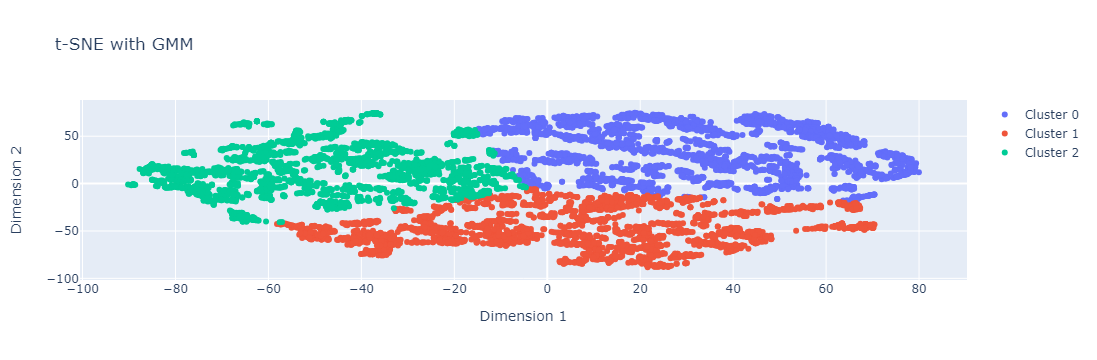

In [57]:
plot_clusters(X_tsne_reduced, Gmm_tsne_labels, "GMM")

In [58]:
X_with_labels['Gmm_tsne'] = Gmm_tsne_labels
scores['Gmm_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Gmm_tsne']))

In [59]:
food_groups, value_counts = get_food_groups(X_with_labels['Gmm_tsne'], 'GMM_tsne',food_groups)

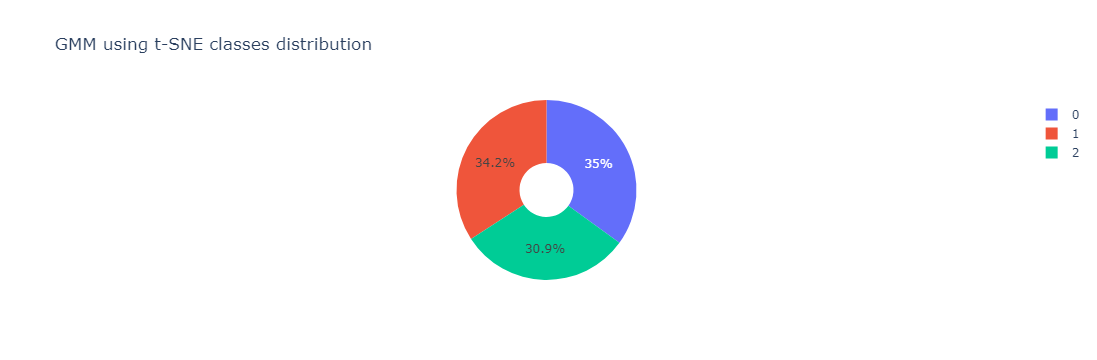

In [60]:
plot_cluster_distribution(value_counts, 'GMM')

In [61]:
GmmTsne = X_with_labels.groupby('Gmm_tsne')

In [62]:
n = GmmTsne['Gmm_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(GmmTsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
...             ...              ...         ...             ...   
8747       0.767846         0.663975    0.715473        0.139076   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
...                              ...                             ...   
8747                        0.000000                        0.000000   
8749                        0.080576                        0.140080   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
0                     0.030388            2         1         0  
1                     0.212894            0         1         0  
14                    0.395637            0         1         0  
100                   0.254692            0         1         0  
101                   0.180514            0         1         0  
...                        ...          ...       ...       ...  
8747                  0.000000            0         1         0  
8749                  0.000000            0         1         0  
8750                  0.180322            0         1         0  
8771                  0.175470            0         1         0  
8773                  0.267429            0         1         0  

[3073 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
10         0.857339         0.957418    0.221928        0.113698   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8701       0.834115         0.883149    0.529703        0.198541   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8788       0.817624         0.893283    0.324179        0.024556   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
10                          0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8701                        0.040132                        0.110093   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8788                        0.002465                        0.005934   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
5                     0.348734            1         0         1  
7                     0.355775            1         0         1  
8                     0.308817            1         0         1  
10                    0.308817            1         0         1  
12                    0.494853            1         0         1  
...                        ...          ...       ...       ...  
8701                  0.051085            1         0         1  
8745                  0.063870            1         0         1  
8748                  0.000000            1         0         1  
8788                  0.009211            2         0         1  
8789                  0.275650            1         0         1  

[3004 rows x 10 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
9          0.721842         0.757620    0.153183        0.055176   
...             ...              ...         ...             ...   
8783       0.556031         0.463708    0.351950        0.035864   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
9                           0.626129                        0.398092   
...                              ...                             ...   
8783                        0.010777                        0.001153   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  
2                     0.003042            2         2         2  
3                     0.014394            2         2         2  
4                     0.014394            2         2         2  
6                     0.180322            2         2         2  
9                     0.308817            2         2         2  
...                        ...          ...       ...       ...  
8783                  0.024012            2         2         2  
8784                  0.122689            2         2         2  
8785                  0.129330            2         2         2  
8786                  0.129330            2         2         2  
8787                  0.000000            2         2         2  

[2713 rows x 10 columns]

### Insights

- Cluster 0 contains highest value for protein among all three clusters, indicating protein-rich food in this cluster.
- Cluster 1 contains the highest values for energy and carbohydrate among all three clusters. 
- Cluster 2 contains lowest value for total lipids and 3 fatty acids. 

## K-Medoids

In [63]:
from clustering_function import tuning_kmedoids, perform_kmd_clustering

In [64]:
kmd_param_grid = {
    'n_clusters': [3, 4],
    'method': ['alternate', 'pam'],
    'init' : ['random', 'heuristic', 'k-medoids++', 'build']
}

In [65]:
tuning_kmedoids(X_tsne_reduced, kmd_param_grid)

Best silhouette score: 0.42564258
Best parameters: {'init': 'random', 'method': 'pam', 'n_clusters': 3}


In [66]:
Kmd_tsne_labels,kmd_model = perform_kmd_clustering(X_tsne_reduced, 3, 'random', 'pam')

In [67]:
# export model
with open('../Model_fitted/Kmd_model_ffill_pkl', 'wb') as files:
    pickle.dump(kmd_model, files)

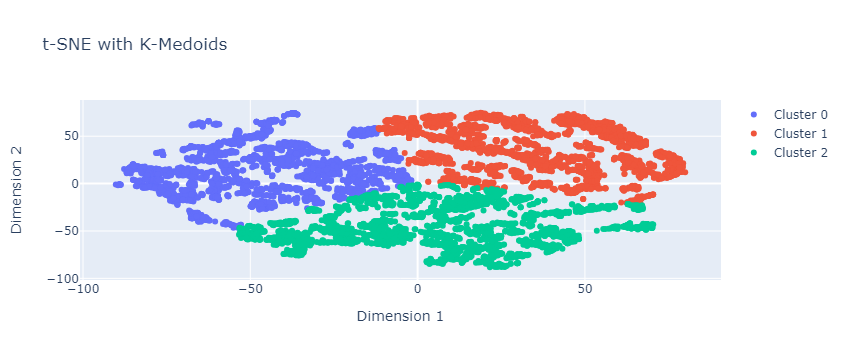

In [68]:
plot_clusters(X_tsne_reduced, Kmd_tsne_labels, "K-Medoids")

In [69]:
X_with_labels['Kmd_tsne'] = Kmd_tsne_labels
scores['Kmd_tsne'] = (silhouette_score(X_tsne_reduced, X_with_labels['Kmd_tsne']))

In [70]:
food_groups, value_counts = get_food_groups(X_with_labels['Kmd_tsne'], 'KMedoids_tsne',food_groups)

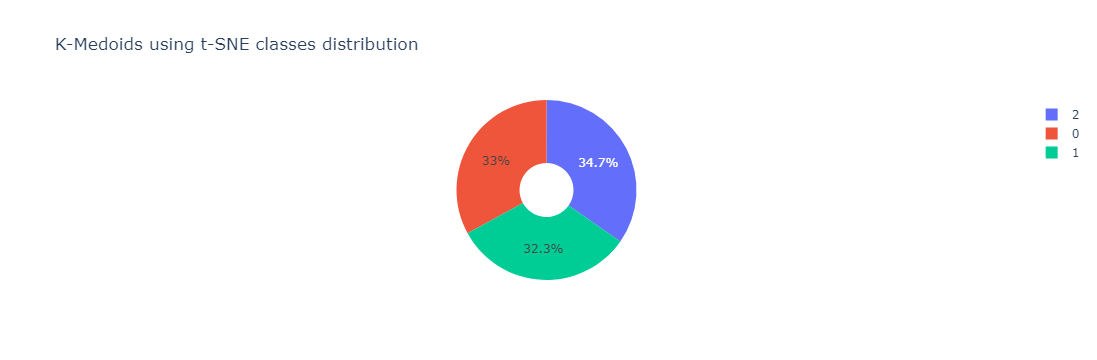

In [71]:
plot_cluster_distribution(value_counts, 'K-Medoids')

In [72]:
Kmdtsne = X_with_labels.groupby('Kmd_tsne')

In [73]:
n = Kmdtsne['Kmd_tsne'].count().count() # number of cluster
for i in range(0,n):
    display(Kmdtsne.get_group(i))

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
0          0.685223         0.421947    0.644650        0.122492   
2          0.624253         0.633388    0.203973        0.020652   
3          0.466968         0.380891    0.074901        0.056849   
4          0.513760         0.468498    0.074901        0.056849   
6          0.670663         0.503637    0.457547        0.324453   
...             ...              ...         ...             ...   
8784       0.656199         0.583869    0.396246        0.175712   
8785       0.654500         0.583869    0.396246        0.175712   
8786       0.654500         0.583869    0.396246        0.175712   
8787       0.642026         0.626764    0.305234        0.000000   
8788       0.817624         0.893283    0.324179        0.024556   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
0                           0.022900                        0.022872   
2                           0.297219                        0.227549   
3                           0.017754                        0.019922   
4                           0.017754                        0.019922   
6                           0.222082                        0.060118   
...                              ...                             ...   
8784                        0.061346                        0.007953   
8785                        0.066435                        0.008176   
8786                        0.066435                        0.008176   
8787                        0.000000                        0.000000   
8788                        0.002465                        0.005934   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
0                     0.030388            2         1         0         0  
2                     0.003042            2         2         2         0  
3                     0.014394            2         2         2         0  
4                     0.014394            2         2         2         0  
6                     0.180322            2         2         2         0  
...                        ...          ...       ...       ...       ...  
8784                  0.122689            2         2         2         0  
8785                  0.129330            2         2         2         0  
8786                  0.129330            2         2         2         0  
8787                  0.000000            2         2         2         0  
8788                  0.009211            2         0         1         0  

[2900 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
1          0.770972         0.539328    0.673774        0.444529   
14         0.816493         0.139076    0.695060        0.644735   
100        0.786376         0.000000    0.756312        0.513785   
101        0.717455         0.000000    0.681411        0.382380   
103        0.999184         0.000000    0.000000        0.998925   
...             ...              ...         ...             ...   
8733       0.822060         0.189696    0.614397        0.684976   
8749       0.769417         0.000000    0.762047        0.442852   
8750       0.733270         0.000000    0.708751        0.396735   
8771       0.632419         0.346116    0.532774        0.232190   
8773       0.673693         0.347863    0.512571        0.388237   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
1                           0.297219                        0.227549   
14                          0.511857                        0.352783   
100                         0.351960                        0.293664   
101                         0.175770                        0.224155   
103                         0.861886                        0.577201   
...                              ...                             ...   
8733                        0.065427                        0.005708   
8749                        0.080576                        0.140080   
8750                        0.246740                        0.204303   
8771                        0.089229                        0.016934   
8773                        0.257480                        0.088905   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
1                     0.212894            0         1         0         1  
14                    0.395637            0         1         0         1  
100                   0.254692            0         1         0         1  
101                   0.180514            0         1         0         1  
103                   0.807114            0         0         0         1  
...                        ...          ...       ...       ...       ...  
8733                  0.478288            0         1         0         1  
8749                  0.000000            0         1         0         1  
8750                  0.180322            0         1         0         1  
8771                  0.175470            0         1         0         1  
8773                  0.267429            0         1         0         1  

[2841 rows x 11 columns]

Energy (Kcal)  Carbohydrate(g)  Protein(g)  Total Lipid(g)  \
5          0.913731         0.870851    0.476131        0.745258   
7          0.916054         0.866962    0.491577        0.753711   
8          0.875881         0.808581    0.437893        0.696246   
10         0.857339         0.957418    0.221928        0.113698   
12         0.904365         0.529205    0.512571        0.822403   
...             ...              ...         ...             ...   
8710       0.753763         0.650193    0.611561        0.424712   
8725       0.859472         0.591069    0.577721        0.718901   
8745       0.859894         0.897421    0.719463        0.181414   
8748       0.858196         0.937465    0.463454        0.219193   
8789       0.889955         0.936086    0.535802        0.513582   

      Monounsaturated Fatty Acids(g)  Polyunsaturated Fatty Acids(g)  \
5                           0.676104                        0.443583   
7                           0.684742                        0.451553   
8                           0.626129                        0.398092   
10                          0.626129                        0.398092   
12                          0.632893                        0.671998   
...                              ...                             ...   
8710                        0.223756                        0.326182   
8725                        0.444714                        0.657667   
8745                        0.024320                        0.103539   
8748                        0.080576                        0.140080   
8789                        0.373303                        0.259528   

      Saturated Fatty Acids(g)  kmeans_tsne  Agg_tsne  Gmm_tsne  Kmd_tsne  
5                     0.348734            1         0         1         2  
7                     0.355775            1         0         1         2  
8                     0.308817            1         0         1         2  
10                    0.308817            1         0         1         2  
12                    0.494853            1         0         1         2  
...                        ...          ...       ...       ...       ...  
8710                  0.140432            1         1         0         2  
8725                  0.360711            1         0         0         2  
8745                  0.063870            1         0         1         2  
8748                  0.000000            1         0         1         2  
8789                  0.275650            1         0         1         2  

[3049 rows x 11 columns]

### Insights

- Cluster 0 contains moderate values of energy and carbohydrate.
- Cluster 1 contains high values for energy and the lowest value of carbohydrate among all three clusters, suggesting low carbohydrate foods to be grouped in this cluster.
- Cluster 2 contains very high values for energy and carbohydrate, and moderate value for protein among all three clusters.

Cluster 0 and 1 indicate quite low values in the three fat nutrients, while cluster 2 shows moderate to high values in the total lipids.

In [74]:
scores

{'kmeans_tsne': 0.4257467,
 'Agg_tsne': 0.40226936,
 'Gmm_tsne': 0.42262316,
 'Kmd_tsne': 0.42564258}

The K-Means model was shown to be the most effective one when the dataset's missing values were filled in using the forward filling approach.